# Case Study 4

Use Random Forest and XGBoost to accurately predict bankruptcy. Tune your models for maximum accuracy, but include precision and recall as summary metrics.

Based on ["Ensemble boosted trees with synthetic features generation in application to bankruptcy prediction"](https://libkey.io/libraries/146/articles/58456660/full-text-file?utm_source=api_1965). The paper provides details on the attributes and results for various classification models. Your can get the paper for free through the library by signing in with your SMU credentials.

```{admonition} Note
- Multiple years not to be used as a timeseries
- Missing data
- You should be able to achieve the same model performances as in the paper
- Model should be tuned using hyper-parameter optimization, see [here](https://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search)
```

In [3]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff

## Loading ARFF Files

In [4]:
year1 = loadarff("1year.arff")
year1_df = pd.DataFrame(year1[0])

year2 = loadarff("2year.arff")
year2_df = pd.DataFrame(year2[0])

year3 = loadarff("3year.arff")
year3_df = pd.DataFrame(year3[0])

year4 = loadarff("4year.arff")
year4_df = pd.DataFrame(year4[0])

year5 = loadarff("1year.arff")
year5_df = pd.DataFrame(year5[0])

In [35]:
year1_df

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.04720,32.3510,0.388250,0.249760,1.330500,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.47225,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.26713,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,b'0'
3,0.081483,0.30734,0.45879,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,b'0'
4,0.187320,0.61323,0.22960,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.018371,0.47410,-0.13619,0.60839,-18.4490,0.018371,0.018371,0.972030,1.01210,0.460840,...,0.011909,0.039866,0.98809,0.274140,73.5050,79.2370,31.268,11.6730,5.14890,b'1'
7023,-0.013359,0.58354,-0.02265,0.92896,-42.2320,-0.013359,-0.015036,0.562890,0.98904,0.328470,...,-0.011082,-0.040671,1.01110,0.805920,10.5990,7.1740,94.092,3.8792,1.75720,b'1'
7024,0.006338,0.50276,0.43923,1.87360,9.7417,0.006338,0.012022,0.983560,1.00830,0.494490,...,0.008258,0.012817,0.99174,0.000000,10.4700,6.0759,51.019,7.1542,62.00100,b'1'
7025,-0.041643,0.84810,-0.12852,0.57485,-121.9200,0.000000,-0.036795,0.179010,0.42138,0.151820,...,-0.232720,-0.274290,0.98788,3.593100,39.7030,3.1420,261.850,1.3939,0.51005,b'1'


In [ ]:
year1_df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,7024.000000,7024.000000,7024.000000,6997.000000,7.019000e+03,7024.000000,7024.000000,7002.000000,7026.000000,7024.000000,...,7.027000e+03,7.027000e+03,7026.000000,7.027000e+03,7026.000000,6.892000e+03,7005.000000,7.027000e+03,6997.000000,6993.000000
mean,0.034660,0.560215,0.119969,2.629143,-2.631672e+02,0.059712,0.313876,2.623996,5.552855,1.825832,...,8.855693e+03,-1.577367e+02,0.193243,1.587409e+02,0.277829,4.328830e+02,15.642228,4.763202e+03,8.126852,208.731950
std,4.565504,5.350084,5.275459,13.257356,3.707460e+04,6.051113,8.353274,18.708327,101.995448,33.836452,...,7.247527e+04,1.322125e+04,4.344046,1.322124e+04,6.339149,2.612802e+04,261.554534,3.107835e+05,19.996419,5140.708804
min,-256.890000,-72.162000,-440.500000,0.000000,-2.722100e+06,-397.890000,-189.560000,-141.410000,0.000005,-440.550000,...,-8.004700e+05,-1.108300e+06,-315.370000,-4.194000e-03,-327.970000,4.700000e-05,0.000016,0.000000e+00,0.000015,0.000010
25%,0.021182,0.296678,0.026968,1.063100,-4.449800e+01,0.000000,0.028023,0.445710,1.037225,0.300785,...,9.712000e+01,2.031450e-02,0.056772,8.647650e-01,0.000000,5.923950e+00,4.829000,4.322250e+01,3.425400,2.538600
50%,0.075802,0.482960,0.181275,1.502000,-5.373900e+00,0.000000,0.090109,1.015100,1.205750,0.492235,...,1.604800e+03,6.338200e-02,0.175745,9.388100e-01,0.028438,1.004050e+01,7.033700,6.850900e+01,5.303200,4.637700
75%,0.160268,0.680233,0.362548,2.460700,3.777050e+01,0.146660,0.188667,2.267675,2.132975,0.675677,...,5.955900e+03,1.376950e-01,0.351922,9.820150e-01,0.273867,2.013900e+01,10.703000,1.063350e+02,8.357900,9.782200
max,94.280000,441.500000,1.000000,1017.800000,9.909000e+05,303.670000,453.770000,1452.200000,3876.100000,1099.500000,...,4.398400e+06,1.000000e+00,126.670000,1.108300e+06,119.580000,2.137800e+06,21110.000000,2.501600e+07,1042.200000,294770.000000


In [34]:
year1_df.shape

(7027, 65)

In [ ]:
year2_df.shape

(10173, 65)

In [5]:
dataframes_dict = {
    'year_1': year1_df,
    'year_2': year2_df,
    'year_3': year3_df,
    'year_4': year4_df,
    'year_5': year5_df
}


## Convert "class" column to labels 0 or 1

In [6]:
def convert_class_labels(value):
    return int(value.decode('utf-8'))

# Loop through each dataframe and convert the "class" column
for year, df in dataframes_dict.items():
    if 'class' in df.columns:
        df['class'] = df['class'].apply(convert_class_labels)

# Print the first few rows of the updated dataframes
for year, df in dataframes_dict.items():
    print(f"\n{year}:\n")
    print(df.head())


year_1:

      Attr1    Attr2    Attr3   Attr4    Attr5    Attr6     Attr7    Attr8  \
0  0.200550  0.37951  0.39641  2.0472  32.3510  0.38825  0.249760  1.33050   
1  0.209120  0.49988  0.47225  1.9447  14.7860  0.00000  0.258340  0.99601   
2  0.248660  0.69592  0.26713  1.5548  -1.1523  0.00000  0.309060  0.43695   
3  0.081483  0.30734  0.45879  2.4928  51.9520  0.14988  0.092704  1.86610   
4  0.187320  0.61323  0.22960  1.4063  -7.3128  0.18732  0.187320  0.63070   

    Attr9   Attr10  ...    Attr56   Attr57   Attr58    Attr59  Attr60  Attr61  \
0  1.1389  0.50494  ...  0.121960  0.39718  0.87804  0.001924  8.4160  5.1372   
1  1.6996  0.49788  ...  0.121300  0.42002  0.85300  0.000000  4.1486  3.2732   
2  1.3090  0.30408  ...  0.241140  0.81774  0.76599  0.694840  4.9909  3.9510   
3  1.0571  0.57353  ...  0.054015  0.14207  0.94598  0.000000  4.5746  3.6147   
4  1.1559  0.38677  ...  0.134850  0.48431  0.86515  0.124440  6.3985  4.3158   

    Attr62  Attr63   Attr64  class

## Plots for class distribution for each year


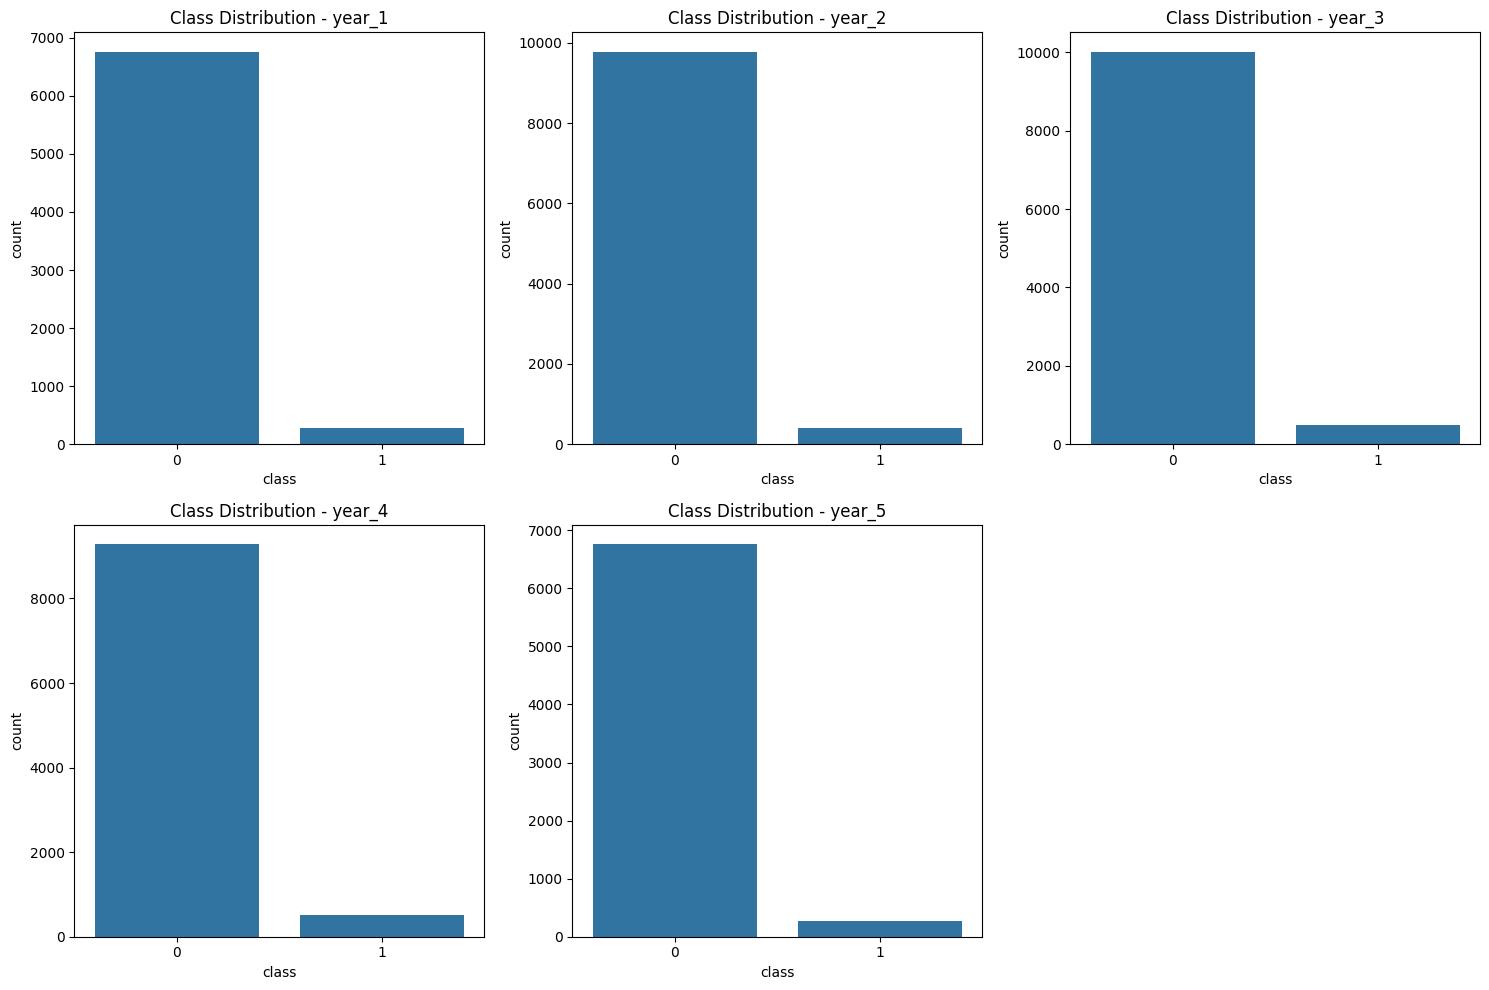

In [37]:
plt.figure(figsize=(15, 10))
for i, (year, df) in enumerate(dataframes_dict.items(), 1):
    plt.subplot(2, 3, i)
    sns.countplot(x='class', data=df)
    plt.title(f'Class Distribution - {year}')

plt.tight_layout()
plt.show()

In [ ]:
combined_df = pd.concat(dataframes_dict.values(), axis=0, keys=dataframes_dict.keys())
combined_df

Attr1    Attr2    Attr3    Attr4     Attr5     Attr6  \
year_1 0     0.200550  0.37951  0.39641  2.04720   32.3510  0.388250   
       1     0.209120  0.49988  0.47225  1.94470   14.7860  0.000000   
       2     0.248660  0.69592  0.26713  1.55480   -1.1523  0.000000   
       3     0.081483  0.30734  0.45879  2.49280   51.9520  0.149880   
       4     0.187320  0.61323  0.22960  1.40630   -7.3128  0.187320   
...               ...      ...      ...      ...       ...       ...   
year_5 7022  0.018371  0.47410 -0.13619  0.60839  -18.4490  0.018371   
       7023 -0.013359  0.58354 -0.02265  0.92896  -42.2320 -0.013359   
       7024  0.006338  0.50276  0.43923  1.87360    9.7417  0.006338   
       7025 -0.041643  0.84810 -0.12852  0.57485 -121.9200  0.000000   
       7026  0.014946  0.94648  0.03211  1.03630  -20.5810  0.000000   

                Attr7     Attr8    Attr9    Attr10  ...    Attr56    Attr57  \
year_1 0     0.249760  1.330500  1.13890  0.504940  ...  0.121960  0.397180   
       1     0.258340  0.996010  1.69960  0.497880  ...  0.121300  0.420020   
       2     0.309060  0.436950  1.30900  0.304080  ...  0.241140  0.817740   
       3     0.092704  1.866100  1.05710  0.573530  ...  0.054015  0.142070   
       4     0.187320  0.630700  1.15590  0.386770  ...  0.134850  0.484310   
...               ...       ...      ...       ...  ...       ...       ...   
year_5 7022  0.018371  0.972030  1.01210  0.460840  ...  0.011909  0.039866   
       7023 -0.015036  0.562890  0.98904  0.328470  ... -0.011082 -0.040671   
       7024  0.012022  0.983560  1.00830  0.494490  ...  0.008258  0.012817   
       7025 -0.036795  0.179010  0.42138  0.151820  ... -0.232720 -0.274290   
       7026  0.015260  0.056357  2.96940  0.053341  ...  0.015705  0.280210   

              Attr58    Attr59   Attr60   Attr61   Attr62   Attr63    Attr64  \
year_1 0     0.87804  0.001924   8.4160   5.1372   82.658   4.4158   7.42770   
       1     0.85300  0.000000   4.1486   3.2732  107.350   3.4000  60.98700   
       2     0.76599  0.694840   4.9909   3.9510  134.270   2.7185   5.20780   
       3     0.94598  0.000000   4.5746   3.6147   86.435   4.2228   5.54970   
       4     0.86515  0.124440   6.3985   4.3158  127.210   2.8692   7.89800   
...              ...       ...      ...      ...      ...      ...       ...   
year_5 7022  0.98809  0.274140  73.5050  79.2370   31.268  11.6730   5.14890   
       7023  1.01110  0.805920  10.5990   7.1740   94.092   3.8792   1.75720   
       7024  0.99174  0.000000  10.4700   6.0759   51.019   7.1542  62.00100   
       7025  0.98788  3.593100  39.7030   3.1420  261.850   1.3939   0.51005   
       7026  0.97443  1.179200  15.0360   4.1741  108.640   3.3599  35.11800   

             class  
year_1 0      b'0'  
       1      b'0'  
       2      b'0'  
       3      b'0'  
       4      b'0'  
...            ...  
year_5 7022   b'1'  
       7023   b'1'  
       7024   b'1'  
       7025   b'1'  
       7026   b'1'  

[44522 rows x 65 columns]

## Distribution of Length for Each Year

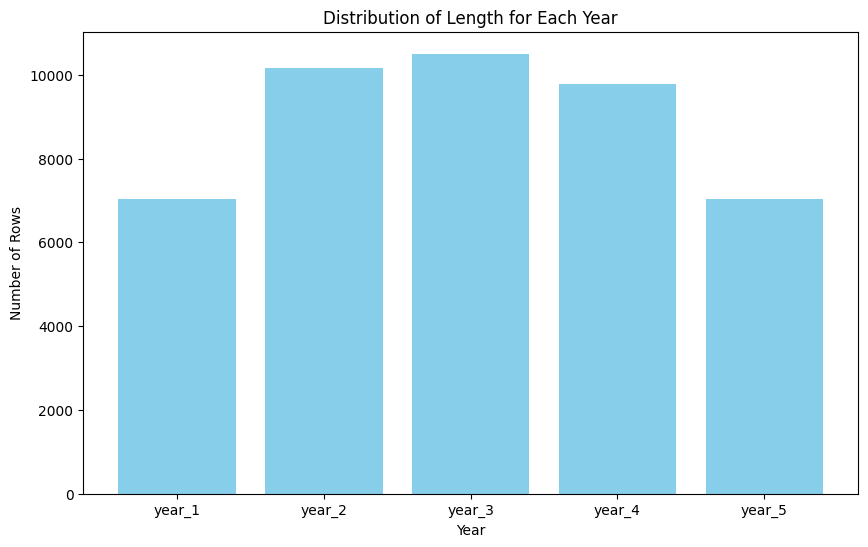

In [ ]:
years = list(dataframes_dict.keys())
lengths = [len(df) for df in dataframes_dict.values()]

plt.figure(figsize=(10, 6))
plt.bar(years, lengths, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Rows')
plt.title('Distribution of Length for Each Year')
plt.show()

In [ ]:
for year, df in dataframes_dict.items():
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]  # Select only columns with missing values
    if not missing_values.empty:
        print(f"\nMissing Values in {year}:\n")
        display(missing_values.to_frame(name='Count'))


Missing Values in year_1:



,Count
Attr1,3
Attr2,3
Attr3,3
Attr4,30
Attr5,8
Attr6,3
Attr7,3
Attr8,25
Attr9,1
Attr10,3



Missing Values in year_2:



,Count
Attr1,1
Attr2,1
Attr3,1
Attr4,22
Attr5,24
...,...
Attr60,543
Attr61,16
Attr62,63
Attr63,22



Missing Values in year_3:



,Count
Attr4,18
Attr5,25
Attr8,14
Attr9,3
Attr12,18
Attr13,43
Attr15,8
Attr16,14
Attr17,14
Attr19,43



Missing Values in year_4:



,Count
Attr1,1
Attr2,1
Attr3,1
Attr4,43
Attr5,21
...,...
Attr60,614
Attr61,32
Attr62,21
Attr63,43



Missing Values in year_5:



,Count
Attr1,3
Attr2,3
Attr3,3
Attr4,30
Attr5,8
Attr6,3
Attr7,3
Attr8,25
Attr9,1
Attr10,3


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


## Missing Values Heatmaps

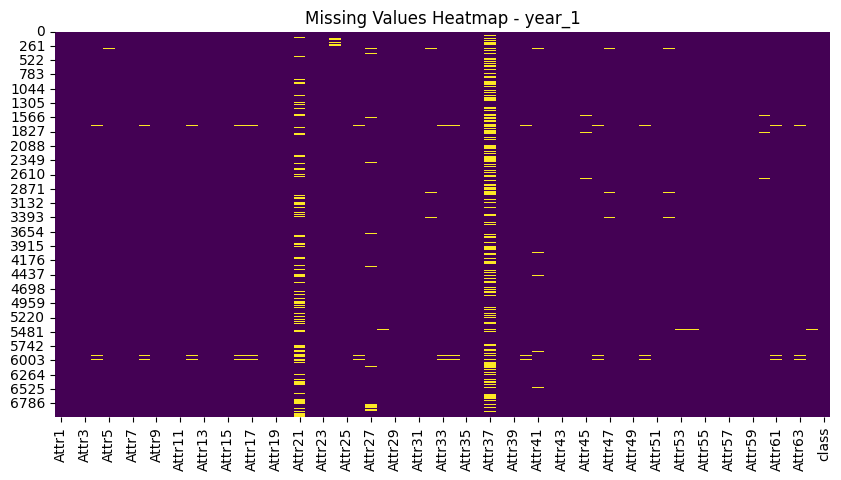

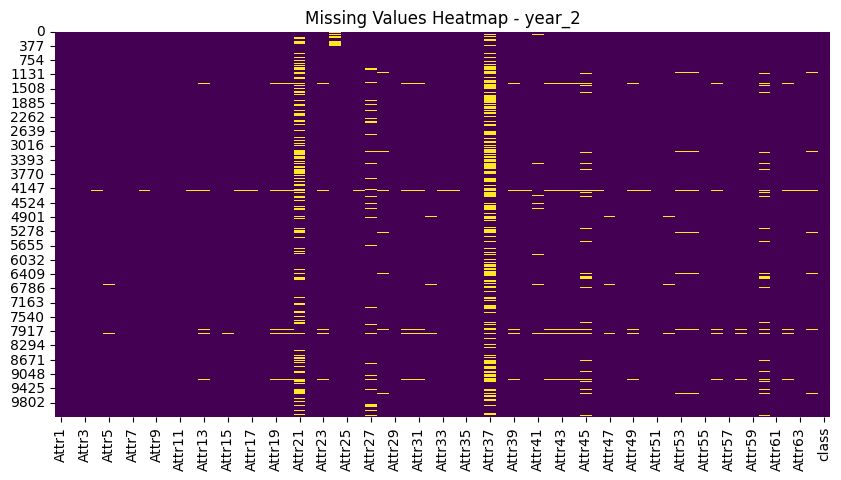

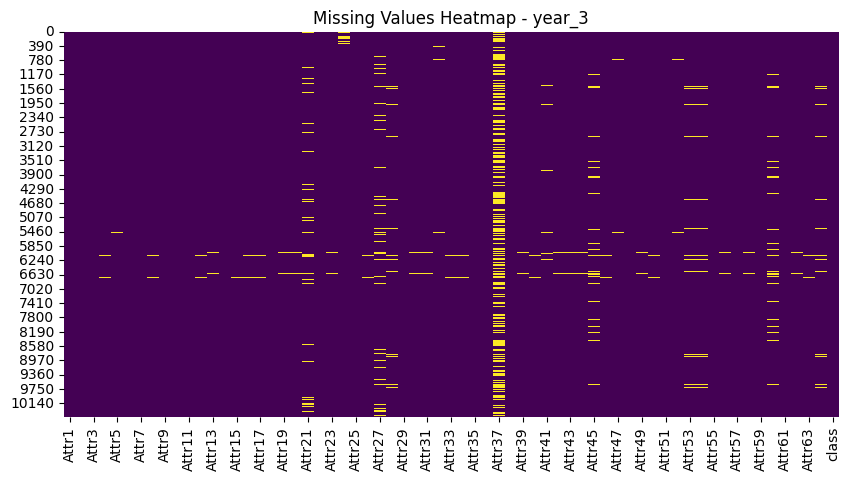

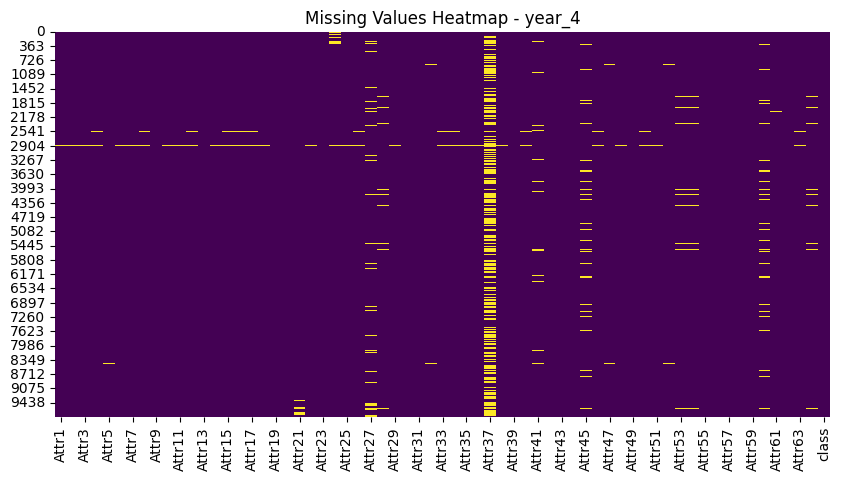

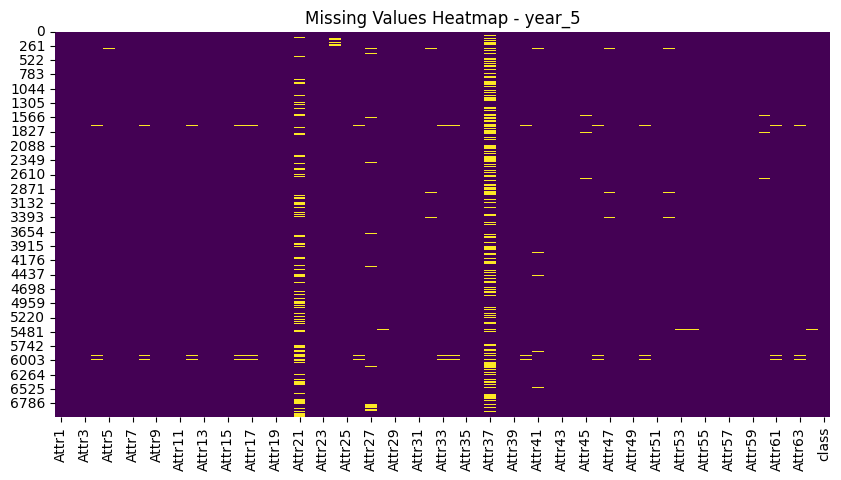

In [38]:

import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

for year, df in dataframes_dict.items():
    plt.figure(figsize=(10, 5))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title(f"Missing Values Heatmap - {year}")
    plt.show()

## Correlation Heatmap

<Axes: >

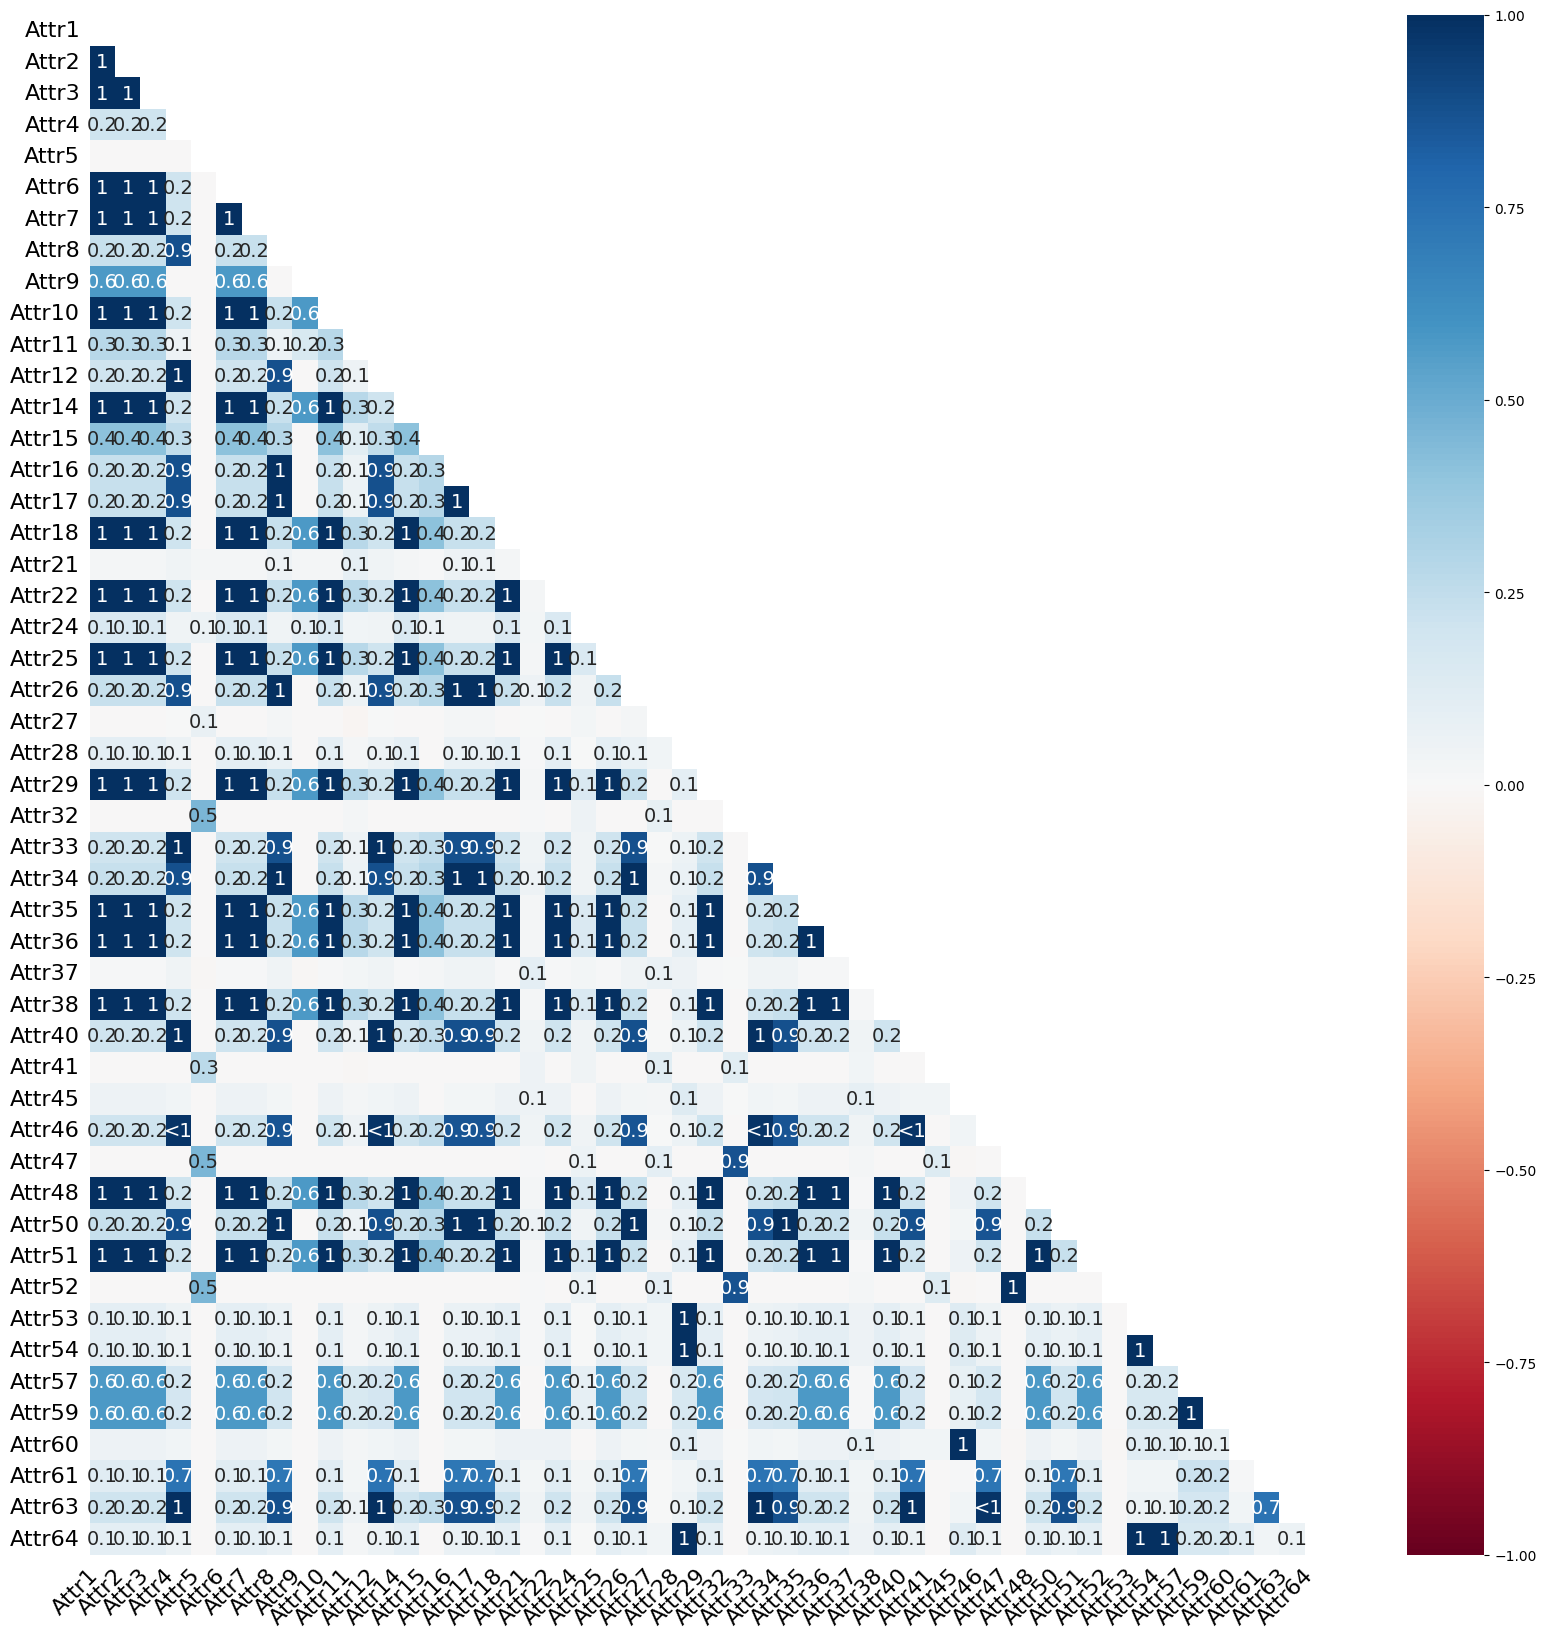

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get year_1 dataframe
year_1_df = dataframes_dict['year_1']

missing_df_i = year_1_df.columns[year_1_df.isnull().any()].tolist()
msno.heatmap(year_1_df[missing_df_i], figsize=(20,20))


In [7]:
year1 = dataframes_dict['year_1']
year1

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.04720,32.3510,0.388250,0.249760,1.330500,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,0.209120,0.49988,0.47225,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0
2,0.248660,0.69592,0.26713,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,0.081483,0.30734,0.45879,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0
4,0.187320,0.61323,0.22960,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.018371,0.47410,-0.13619,0.60839,-18.4490,0.018371,0.018371,0.972030,1.01210,0.460840,...,0.011909,0.039866,0.98809,0.274140,73.5050,79.2370,31.268,11.6730,5.14890,1
7023,-0.013359,0.58354,-0.02265,0.92896,-42.2320,-0.013359,-0.015036,0.562890,0.98904,0.328470,...,-0.011082,-0.040671,1.01110,0.805920,10.5990,7.1740,94.092,3.8792,1.75720,1
7024,0.006338,0.50276,0.43923,1.87360,9.7417,0.006338,0.012022,0.983560,1.00830,0.494490,...,0.008258,0.012817,0.99174,0.000000,10.4700,6.0759,51.019,7.1542,62.00100,1
7025,-0.041643,0.84810,-0.12852,0.57485,-121.9200,0.000000,-0.036795,0.179010,0.42138,0.151820,...,-0.232720,-0.274290,0.98788,3.593100,39.7030,3.1420,261.850,1.3939,0.51005,1


In [8]:
# Drop columns Attr21 and Attr37
year1 = year1.drop(['Attr21', 'Attr37'], axis=1)

# Drop rows containing missing values in other columns
year1 = year1.dropna()

In [9]:
df=year1.copy()

## XGBoost Model

In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [14]:
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train XGBoost on the resampled data
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the model on the original test set
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy on the test set: {accuracy_xgb}")

Accuracy on the test set: 0.9802215189873418


In [22]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)

print(f'Precision: {precision_xgb:.4f}')
print(f'Recall: {recall_xgb:.4f}')

Precision: 0.2308
Recall: 0.1667


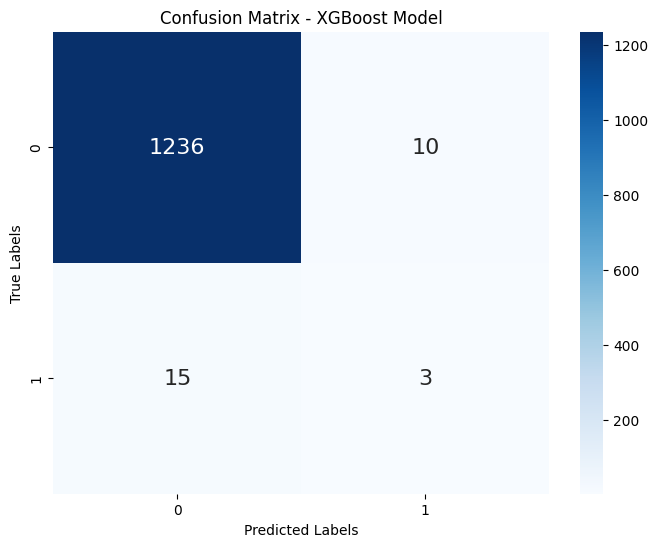

In [73]:
from sklearn.metrics import confusion_matrix

cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - XGBoost Model')
plt.show()

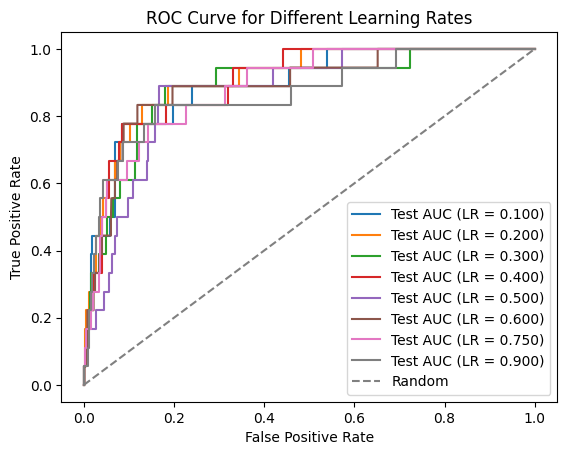

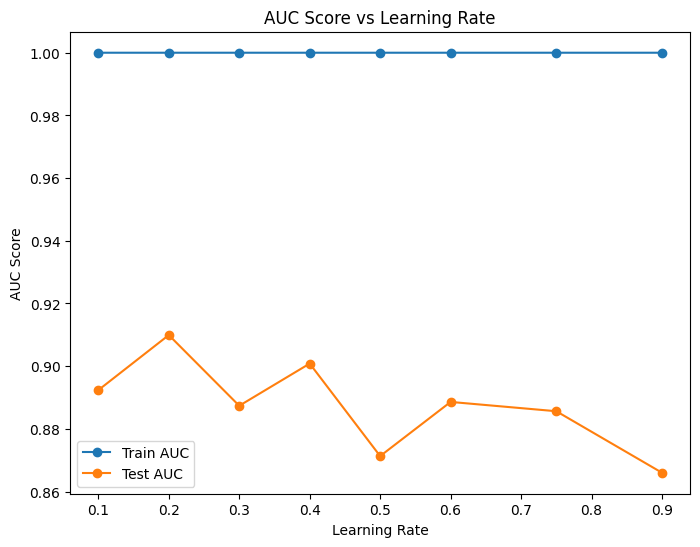

In [18]:
from sklearn.metrics import roc_curve, auc

# Define the learning rates to tune
learning_rates = [0.1,0.2,0.3,0.4,0.5,0.6,0.75,0.9]

train_auc_scores = []
test_auc_scores = []

# Perform hyperparameter tuning on the learning rate
for learning_rate in learning_rates:
    model_xgb.set_params(learning_rate=learning_rate)

    # Train the model on the resampled data
    model_xgb.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the training set
    y_train_pred_prob = model_xgb.predict_proba(X_train_resampled)[:, 1]

    # Calculate the training ROC curve and AUC
    fpr_train, tpr_train, _ = roc_curve(y_train_resampled, y_train_pred_prob)
    auc_train = auc(fpr_train, tpr_train)
    train_auc_scores.append(auc_train)

    # Make predictions on the testing set
    y_test_pred_prob = model_xgb.predict_proba(X_test)[:, 1]

    # Calculate the testing ROC curve and AUC
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
    auc_test = auc(fpr_test, tpr_test)
    test_auc_scores.append(auc_test)

    # Plot ROC curve for each learning rate
    plt.plot(fpr_test, tpr_test, label=f'Test AUC (LR = {learning_rate:.3f})')

# Plot the ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Learning Rates')
plt.legend()
plt.show()

# Plot AUC scores for different learning rates
plt.figure(figsize=(8, 6))
plt.plot(learning_rates, train_auc_scores, marker='o', label='Train AUC')
plt.plot(learning_rates, test_auc_scores, marker='o', label='Test AUC')
plt.xlabel('Learning Rate')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Learning Rate')
plt.legend()
plt.show()

In [19]:
# Identify the best learning rate based on the test AUC
best_learning_rate = learning_rates[test_auc_scores.index(max(test_auc_scores))]
print(f"Best Learning Rate: {best_learning_rate}")

Best Learning Rate: 0.2


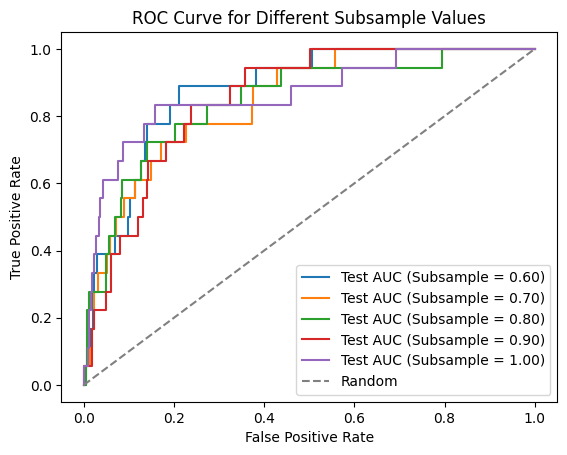

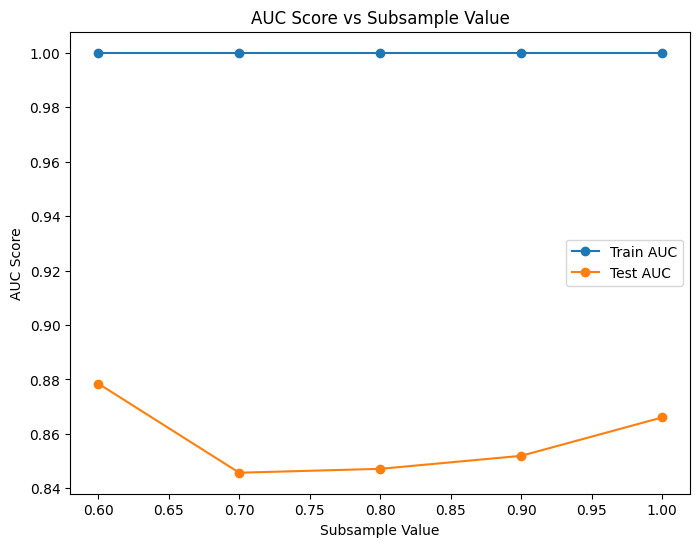

Best Subsample Value: 0.6


In [20]:
# Define the subsample values to tune
subsample_values = [0.6, 0.7, 0.8, 0.9, 1.0]

# Create empty lists to store AUC scores
train_auc_scores = []
test_auc_scores = []

# Perform hyperparameter tuning on the subsample
for subsample in subsample_values:
    model_xgb.set_params(subsample=subsample)

    # Train the model on the resampled data
    model_xgb.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the training set
    y_train_pred_prob = model_xgb.predict_proba(X_train_resampled)[:, 1]

    # Calculate the training ROC curve and AUC
    fpr_train, tpr_train, _ = roc_curve(y_train_resampled, y_train_pred_prob)
    auc_train = auc(fpr_train, tpr_train)
    train_auc_scores.append(auc_train)

    # Make predictions on the testing set
    y_test_pred_prob = model_xgb.predict_proba(X_test)[:, 1]

    # Calculate the testing ROC curve and AUC
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
    auc_test = auc(fpr_test, tpr_test)
    test_auc_scores.append(auc_test)

    # Plot ROC curve for each subsample value
    plt.plot(fpr_test, tpr_test, label=f'Test AUC (Subsample = {subsample:.2f})')

# Plot the ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Subsample Values')
plt.legend()
plt.show()

# Plot AUC scores for different subsample values
plt.figure(figsize=(8, 6))
plt.plot(subsample_values, train_auc_scores, marker='o', label='Train AUC')
plt.plot(subsample_values, test_auc_scores, marker='o', label='Test AUC')
plt.xlabel('Subsample Value')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Subsample Value')
plt.legend()
plt.show()

# Identify the best subsample value based on the test AUC
best_subsample = subsample_values[test_auc_scores.index(max(test_auc_scores))]
print(f"Best Subsample Value: {best_subsample}")

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.7, 0.9, 1.0],
    'learning_rate': [0.1, 0.2,  0.4, 0.75, 0.9]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 50, 'subsample': 0.6}


In [31]:
# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred_xgb2 = best_model.predict(X_test)

# Evaluate the model
#roc_auc = roc_auc_score(y_test, y_pred)
#print(f'ROC AUC Score on Test Set: {roc_auc:.4f}')

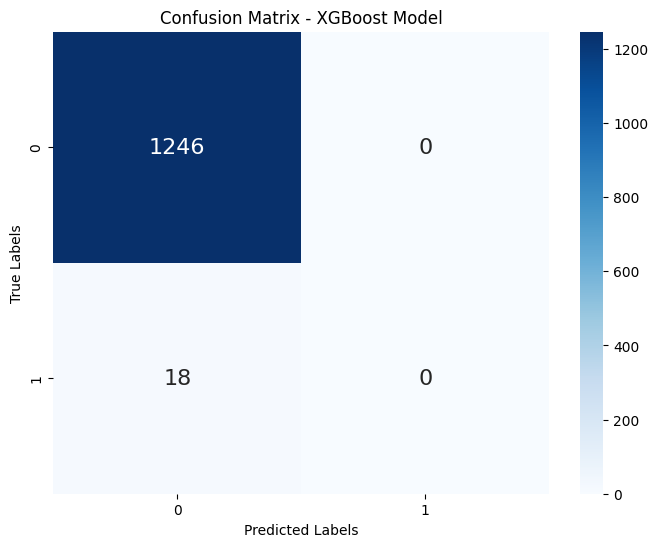

In [32]:
from sklearn.metrics import confusion_matrix

cm_xgb = confusion_matrix(y_test, y_pred_xgb2)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - XGBoost Model')
plt.show()

In [56]:
model_xgb.fit(X_train, y_train)

# Evaluate the model on the original test set
accuracy_xgb2 = model_xgb.score(X_test, y_test)
print(f"Accuracy on the test set: {accuracy_xgb2}")

Accuracy on the test set: 0.9849683544303798


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf= rf_classifier.predict(X_test)

# Calculate accuracy on the testing set
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy_rf)

NameError: name 'y_pred' is not defined

In [34]:
# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

# Use the best model for predictions
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)


Best Hyperparameters:
{'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}


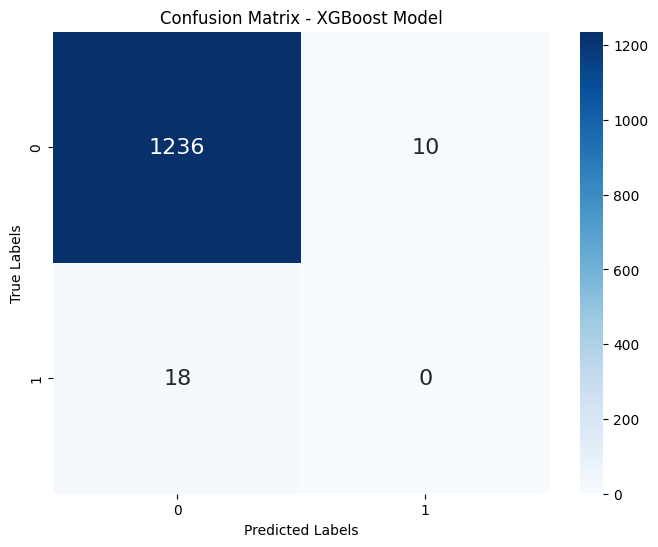

In [35]:
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf , annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - XGBoost Model')
plt.show()

In [36]:
# Calculate metrics for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)

# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

# Create a table
table_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'XGBoost': [accuracy_xgb, precision_xgb, recall_xgb],
    'Random Forest': [accuracy_rf, precision_rf, recall_rf]
}

import pandas as pd

result_table = pd.DataFrame(table_data)
result_table

,Metric,XGBoost,Random Forest
0,Accuracy,0.980222,0.983386
1,Precision,0.230769,0.000000
2,Recall,0.166667,0.000000


from matplotlib import pyplot as plt
result_table['XGBoost'].plot(kind='hist', bins=20, title='XGBoost')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result_table['Random Forest'].plot(kind='hist', bins=20, title='Random Forest')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
result_table.groupby('Metric').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result_table.plot(kind='scatter', x='XGBoost', y='Random Forest', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result_table['XGBoost'].plot(kind='line', figsize=(8, 4), title='XGBoost')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
result_table['Random Forest'].plot(kind='line', figsize=(8, 4), title='Random Forest')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(result_table['Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(result_table, x='XGBoost', y='Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(result_table['Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(result_table, x='Random Forest', y='Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)